# Imports

In [370]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score

# Gradient Descent Algorithm With Batch Method

In [371]:
def Batch_GD(X,Y,alpha,epochs,stopping_threshold=0.01):
  #Defines
  thetas,hypotheses,costs=[],[],[]
  theta= np.array(np.zeros((1,X.shape[1] )))
  m= len(X)

  for i in range(epochs):
    thetas.append(theta.copy())
    #1. Calculate hypotheses(ypred)
    hypo = X @ theta.T
    hypotheses.append(hypo)
    #2. Calculate cost
    cost = 1/(2*m) * sum(np.square(hypo-Y))
    costs.append(cost)
    #-- Stop !? --
    if i>0:
      if (abs(costs[i]-costs[i-1]) <= stopping_threshold) : break
    #3. Updata theta
    theta -= alpha*(1/m )* sum((hypo-Y) * X)

  return thetas,theta,costs,hypotheses


In [372]:
def Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred):

  plt.plot(np.array(thetas)[:,:,0],np.array(costs))
  plt.xlabel('theta0')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array(thetas)[:,:,1],np.array(costs))
  plt.xlabel('theta1')
  plt.ylabel('cost')
  plt.show()

  plt.plot(np.array( costs),)
  plt.xlabel('epochs')
  plt.ylabel('cost')
  plt.show()

  plt.scatter(X[:,1],Y)
  [plt.plot(X[:,1],i) for i in hypotheses]
  plt.xlabel('X')
  plt.ylabel('Fited Lines ')
  plt.show()

  plt.scatter(X[:,1],Y)
  plt.plot(X[:,1],y_pred)
  plt.xlabel('X')
  plt.ylabel('Y predict')
  plt.show()



In [373]:
def Run_Batch_GD(X,Y,alpha,epochs):
   thetas,theta,costs,hypotheses = Batch_GD(X,Y,alpha,epochs,stopping_threshold=1e-3)
   y_pred = X @ theta.T
   print(r2_score(Y, y_pred))
   Visual_Plotting(X,Y,thetas,costs,hypotheses,y_pred)


# Try With Simple Linear Regression Data Example

In [374]:
df = pd.read_csv('..\\Assets\\RegData.csv',header=None)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13 entries, 0 to 12
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       13 non-null     float64
 1   1       13 non-null     float64
dtypes: float64(2)
memory usage: 336.0 bytes


In [375]:
df.head()

,0,1
0,2.9,4.0
1,6.7,7.4
2,4.9,5.0
3,7.9,7.2
4,9.8,7.9


In [376]:
X_= np.array(df.iloc[:,0]).reshape(-1,1)
Y= np.array(df.iloc[:,-1]).reshape(-1,1)

In [377]:
#test
print(X_.shape)
print(Y.shape)

(13, 1)
(13, 1)


In [378]:
X0=np.array(np.ones( (X_.shape[0],1 )))
X= np.concatenate((X0,X_),axis=1)
#test
print(X.shape)

(13, 2)


0.7473756021508766


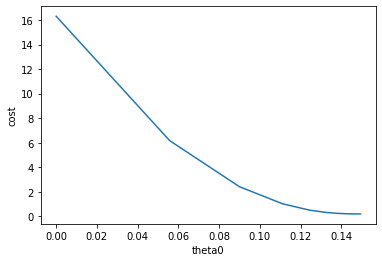

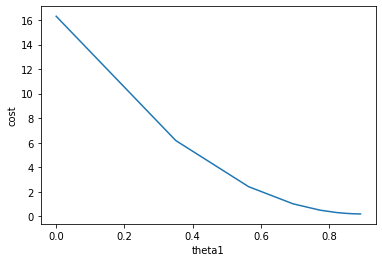

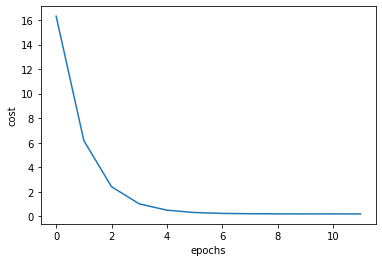

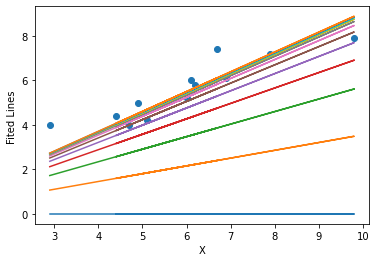

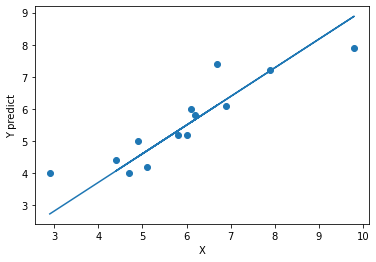

In [379]:
Run_Batch_GD(X,Y,alpha=0.01,epochs=500)

# Try With Multi Variants Linear Regression Data Example

In [380]:
data = pd.read_csv('..\\Assets\\MultipleLR.csv',header =None)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   0       25 non-null     int64
 1   1       25 non-null     int64
 2   2       25 non-null     int64
 3   3       25 non-null     int64
dtypes: int64(4)
memory usage: 928.0 bytes


In [381]:
data.head()

,0,1,2,3
0,73,80,75,152
1,93,88,93,185
2,89,91,90,180
3,96,98,100,196
4,73,66,70,142


In [382]:
# Normalize Data
df=(data - data.mean())/data.std()
X= np.array(df.iloc[:,:-1])
Y= np.array(df.iloc[:,-1]).reshape(-1,1)
print(X.shape)
print(Y.shape)

(25, 3)
(25, 1)


0.9437095666166362


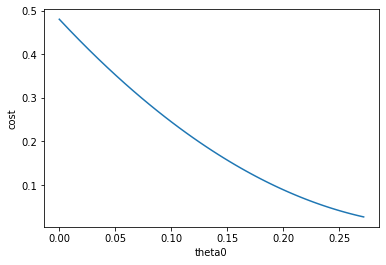

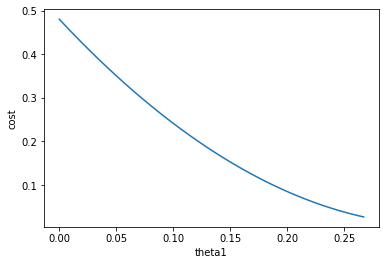

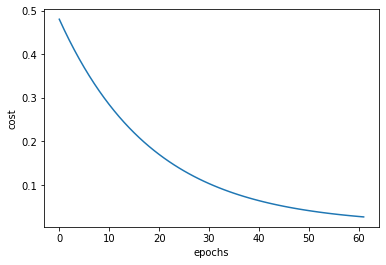

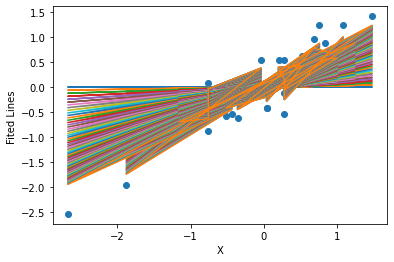

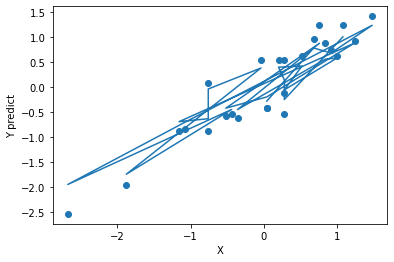

In [383]:
Run_Batch_GD(X,Y,alpha=0.01,epochs=1000)